# Project Title - Hotel Booking Analysis
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

**Numpy,Pandas,Matplotlib,Seaborn**  these libraries are used.

## Importing and Data Loading -

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.
The data is originally from the article Hotel Booking Demand Datasets, written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. I have downloaded it from Kaggle.

There is only one file with 32 columns, the columns are described below :

**hotel** - Type of hotels.

**is_canceled** - Value indicating if the booking was canceled (1) or not (0).

**lead_time** - Number of days that elapsed between the entering date of the booking into the PMS(Hotel Property Management System) and the arrival date.

**arrival_date_year** - Year of arrival date.

**arrival_date_month** - Month of arrival date.

**arrival_date_week_number** - Week number of year for arrival date.

**arrival_date_day_of_month** -Day of arrival date.

**stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

**stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

**adults** - Number of adults.

**children** - Number of children.

**babies** - Number of babies.

**Meal** - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).

**country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format.

**market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

**distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

**is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0).

**previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking.

**previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking.

**reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

**booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS(Hotel Property Management System) until the moment of check-in or cancellation.

**deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

**agent** - ID of the travel agency that made the booking.

**company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.

**days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer.

**customer_type** - Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.

**adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.

**required_car_parking_spaces** - Number of car parking spaces required by the customer.

**total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor).

**reservation_status** - Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.

**reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os
import opendatasets as od
from palettable.colorbrewer.qualitative import Pastel1_7
%matplotlib inline

In [2]:
data_url='https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand'
data_download= od.download(data_url)

Skipping, found downloaded files in ".\hotel-booking-demand" (use force=True to force download)


In [3]:
data_dir='./hotel-booking-demand'

In [4]:
os.listdir(data_dir)

['hotel_bookings.csv']

In [5]:
booking_df=pd.read_csv('./hotel-booking-demand/hotel_bookings.csv')

In [6]:
booking_df_copy=booking_df.copy()

In [7]:
pd.set_option('display.max_columns', None)

## Data Reading - 
Here the data are being read for cleaning and analyzing.

In [8]:
booking_df_copy.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
64626,City Hotel,1,95,2017,March,11,13,2,5,2,0.0,0,BB,ARE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,109.3,0,1,Canceled,2017-01-29
51044,City Hotel,0,309,2016,May,20,13,1,2,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,3.0,NaN,215,Transient-Party,65.0,0,0,Check-Out,2016-05-16
67868,City Hotel,1,95,2017,May,19,8,1,3,2,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Canceled,2017-02-02


In [9]:
booking_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
booking_df_copy.drop(['agent','company'],inplace=True,axis=1)

In [11]:
booking_df_copy.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [12]:
booking_df_copy.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [13]:
booking_df_copy.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [14]:
booking_df_copy.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [15]:
booking_df_copy.country.value_counts()                

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [16]:
booking_df_copy.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [17]:
booking_df_copy.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [18]:
booking_df_copy.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [19]:
booking_df_copy.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [20]:
booking_df_copy.booking_changes.unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18], dtype=int64)

In [21]:
booking_df_copy.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [22]:
booking_df_copy.required_car_parking_spaces.unique() 

array([0, 1, 2, 8, 3], dtype=int64)

In [23]:
booking_df_copy.days_in_waiting_list.unique()  

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  92,  74, 167,  36], dtype=int64)

In [24]:
booking_df_copy.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

## Data Cleaning and Wrangling- 
Here the created data frame is being formatted in required formats. Unwanted data are removed. Null values are handled.

In [25]:
#null valuesof country are replced with PRT as maximum visitors came from PRT.
booking_df_copy['country'].fillna('PRT',inplace=True)

In [26]:
booking_df_copy['market_segment'].replace(to_replace='Undefined',value='Other',inplace= True)

In [27]:
booking_df_copy['distribution_channel'].replace(to_replace='Undefined',value='Other',inplace= True)

In [28]:
booking_df_copy.children.fillna(0,inplace=True)

In [29]:
booking_df_copy.children=booking_df_copy.children.astype('int64')

In [30]:
#As undefined and SC both refer to the same thing undefined is being replaced by SC
booking_df_copy['meal'].replace(to_replace='Undefined',value='SC',inplace= True)

In [31]:
booking_df_copy.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [32]:
booking_df_copy['meal']    

0         BB
1         BB
2         BB
3         BB
4         BB
          ..
119385    BB
119386    BB
119387    BB
119388    BB
119389    HB
Name: meal, Length: 119390, dtype: object

In [33]:
booking_df_copy.children.unique()

array([ 0,  1,  2, 10,  3], dtype=int64)

In [34]:
booking_df_copy['country'][booking_df_copy['country'].isna()].count()

0

In [35]:
booking_df_copy.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Other', 'Aviation'], dtype=object)

In [36]:
booking_df_copy.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Other', 'GDS'], dtype=object)

## Data Analysis -
By analyzing the data tried to figure out the relations, make them simplified and find out the answers.

### Out of all bookings how many are cancelled?

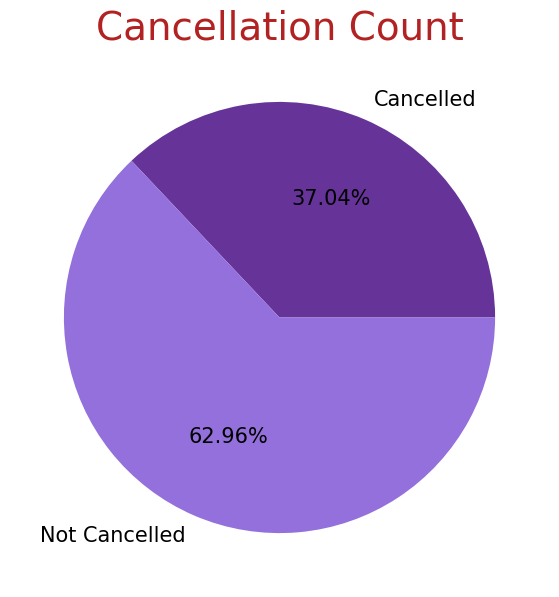

In [37]:
x=booking_df_copy['is_canceled'][booking_df_copy['is_canceled']==1].count()
y=booking_df_copy['is_canceled'][booking_df_copy['is_canceled']==0].count()
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.title("Cancellation Count", size = 28,color='firebrick')
plt.pie([x,y],labels=['Cancelled', 'Not Cancelled'],autopct='%1.2f%%',colors=['rebeccapurple','mediumpurple'])
plt.show()

#### Out of all booking 37.04% bookings are done and then cancelled and 62.96% are not cancelled.

In [38]:
#considering only those bookings those are not cancelled.
booking_df_copy_notCancelled=booking_df_copy[booking_df_copy['is_canceled']==0]

### Out of two types of booking which are mostly preferred by the visitors?

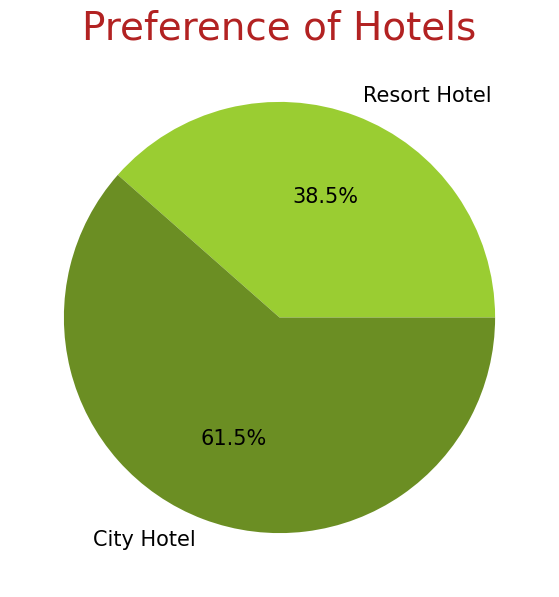

In [39]:
x=booking_df_copy_notCancelled['hotel'][booking_df_copy_notCancelled['hotel']=='Resort Hotel'].count()
y=booking_df_copy_notCancelled['hotel'][booking_df_copy_notCancelled['hotel']=='City Hotel'].count()
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.title("Preference of Hotels", size = 28,color='firebrick')
plt.pie([x,y],labels=['Resort Hotel', 'City Hotel'],autopct='%1.1f%%',colors=['yellowgreen','olivedrab'])
plt.show()

#### City hotels are mostly preferred or booked by the visitors.

### Which year experienced the most visitors?

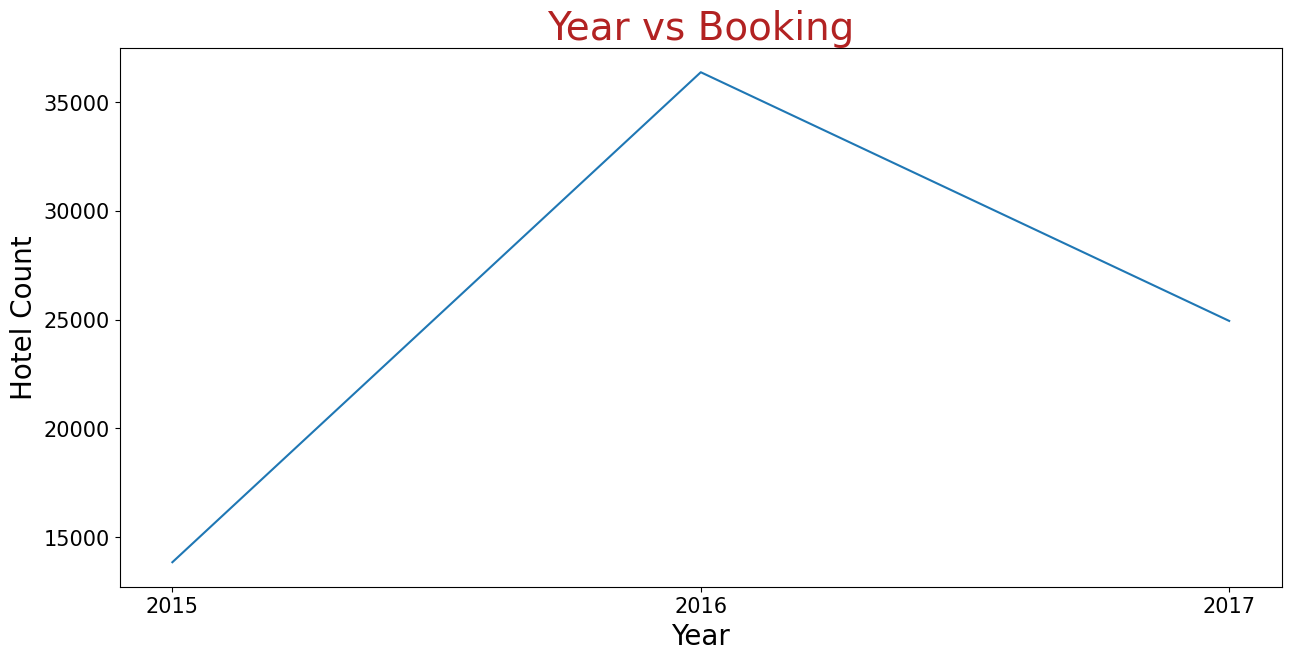

In [40]:
year=booking_df_copy_notCancelled.groupby(['arrival_date_year'])[['arrival_date_year','hotel']].count()
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.title("Year vs Booking", size = 28,color='firebrick')
plt.ylabel("Hotel Count", size = 20)
plt.xlabel("Year", size = 20)
sns.lineplot(x=year.index.astype('string'),y=year['hotel'])
plt.show()

#### We can say from the graph that 2016 had most visitors then 2017 and then 2015 had the least.

### Month wise visitors count per year

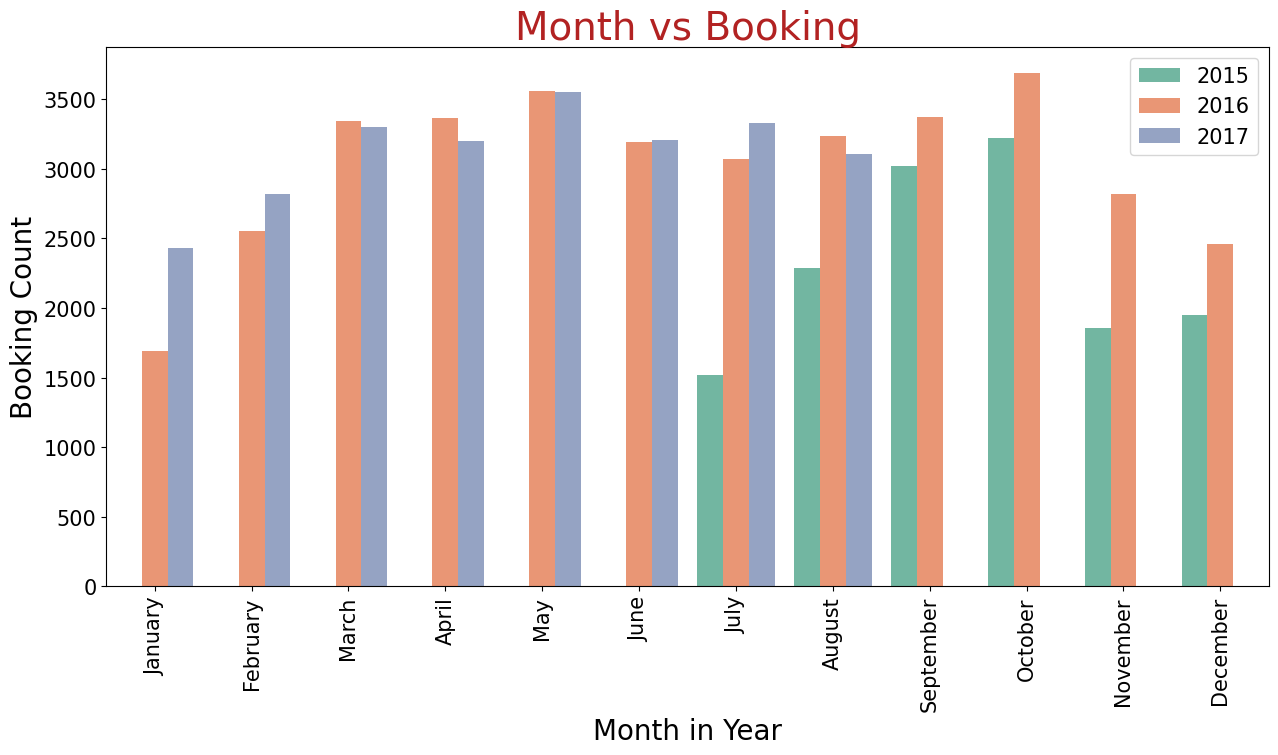

In [41]:
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.title("Month vs Booking", size = 28,color='firebrick')
sns.countplot(x='arrival_date_month',hue='arrival_date_year',order=order,data=booking_df_copy_notCancelled,palette='Set2')
plt.ylabel("Booking Count", size = 20)
plt.xlabel("Month in Year", size = 20)
plt.legend(labels=['2015','2016','2017'])
plt.xticks(rotation=90)
plt.show()

**From the plot we can say that in 2015 visitors start coming from the month July. 
In 2015 October has maximum visitors and July has minimum. 
 In 2016 October has maximum visitors and January has minimum. 
In 2017 May has maximum visitors and January has minimum** 


### Top 10 countries most visitors came from.

In [42]:
booking_df_copy.country.value_counts().head(10)

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

#### PRT, GBR and FRA are the top 3 countries and rest 7 we can see from the graphs.

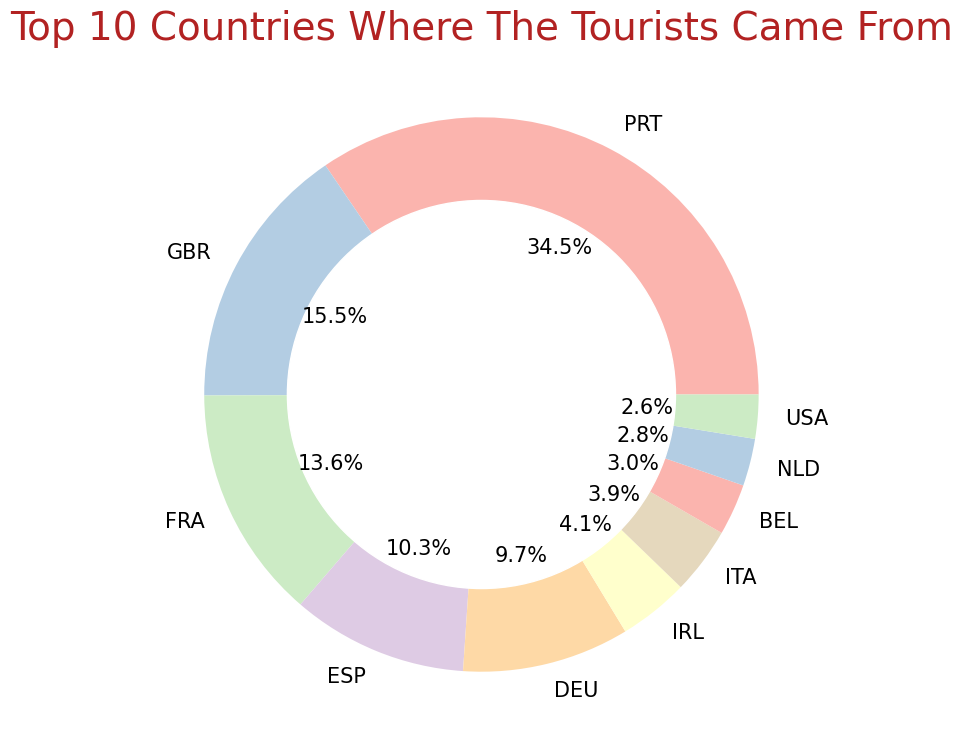

In [43]:
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.figure(figsize = (27, 9))
plt.pie(booking_df_copy_notCancelled.country.value_counts().head(10), labels=booking_df_copy_notCancelled.country.value_counts().head(10).index, autopct='%1.1f%%',colors=Pastel1_7.mpl_colors) 
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Top 10 Countries Where The Tourists Came From", size = 28,color='firebrick')
plt.show()

### Did everyone get the same room what he reserved at the time of booking?

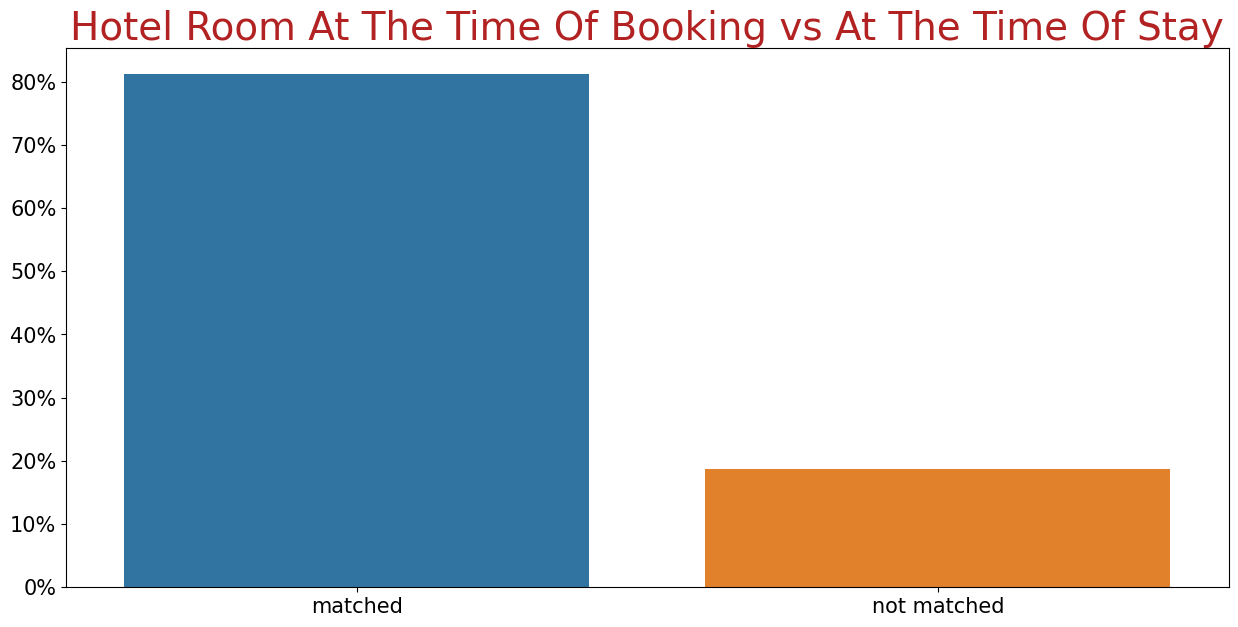

In [44]:
matched=booking_df_copy_notCancelled['assigned_room_type'][(booking_df_copy_notCancelled['assigned_room_type'] == booking_df_copy_notCancelled['reserved_room_type'])].count()
unmatched=booking_df_copy_notCancelled['assigned_room_type'][(booking_df_copy_notCancelled['assigned_room_type'] != booking_df_copy_notCancelled['reserved_room_type'])].count()
matchedPercentage=round(matched * 100 /len(booking_df_copy_notCancelled['assigned_room_type']),2) 
unmatchedPercentage= round(unmatched * 100 /len(booking_df_copy_notCancelled['assigned_room_type']),2)
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.title("Hotel Room At The Time Of Booking vs At The Time Of Stay", size = 28,color='firebrick')
ax = sns.barplot(x=['matched','not matched'],y=[matchedPercentage,unmatchedPercentage])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


#### No, everyone did not get the same room what he booked at the time of reservation. Only for 80% people got the same.

### Hotel wise distribution of assigned rooms 

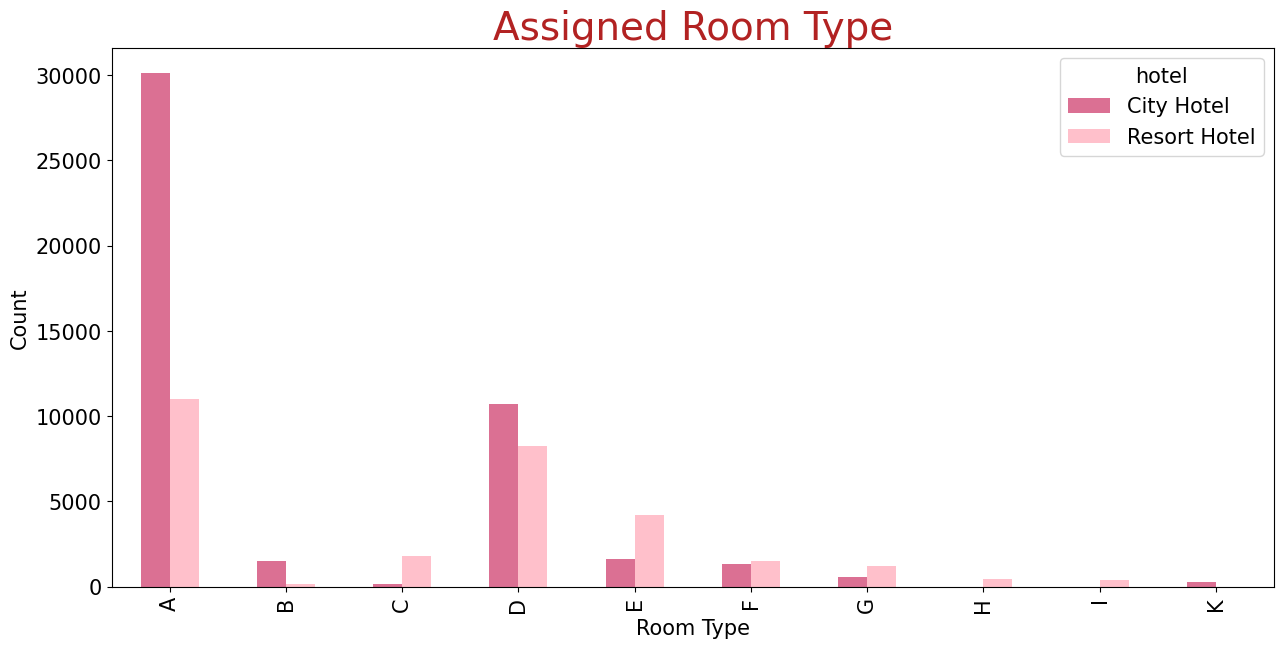

In [45]:
pd.crosstab(booking_df_copy_notCancelled['assigned_room_type'],booking_df_copy_notCancelled['hotel']).plot.bar(figsize=(15,7),color={'City Hotel':'palevioletred','Resort Hotel':'pink'},xlabel='Room Type',ylabel='Count')
plt.title("Assigned Room Type", size = 28,color='firebrick')
plt.show()

#### For any type of hotel Type A room are assigned at the highest rate.

### Hotel wise distribution of reserved rooms 

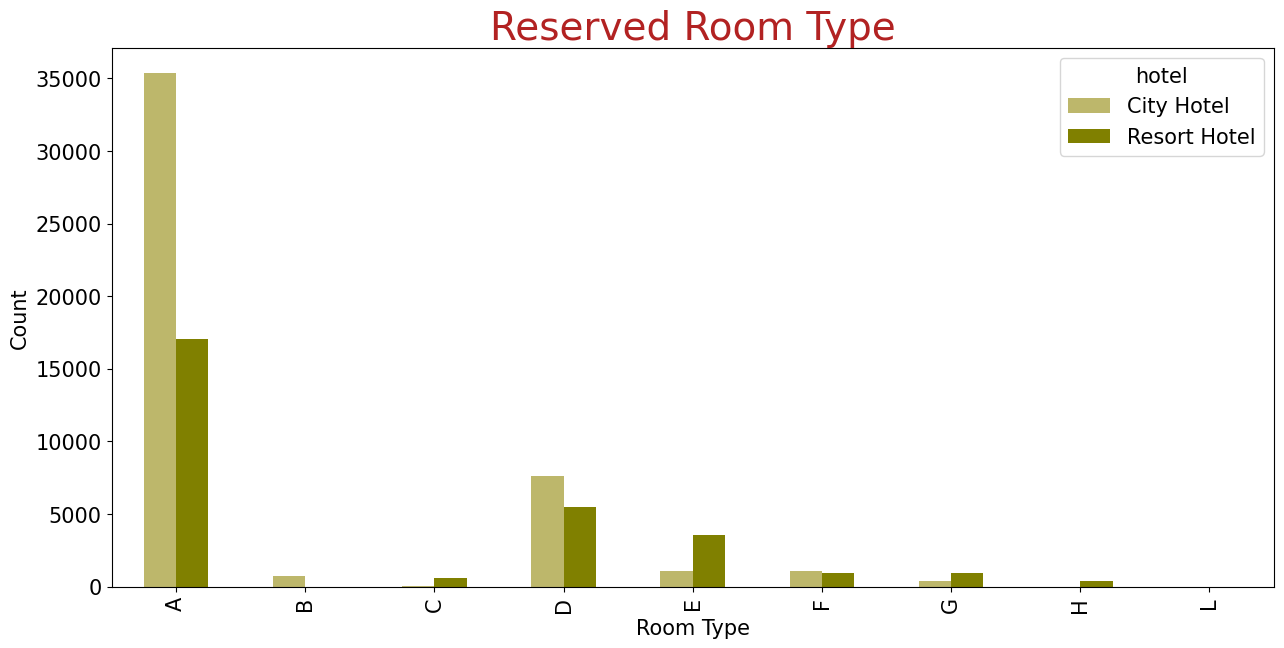

In [46]:
pd.crosstab(booking_df_copy_notCancelled['reserved_room_type'],booking_df_copy_notCancelled['hotel']).plot(kind='bar',figsize=(15,7),color={'City Hotel':'darkkhaki','Resort Hotel':'olive'},xlabel='Room Type',ylabel='Count')
plt.title("Reserved Room Type", size = 28,color='firebrick')
plt.show()

#### For any type of hotel Type A room are reserved at the highest rate.

### Most preferred meal choice of the visitors 

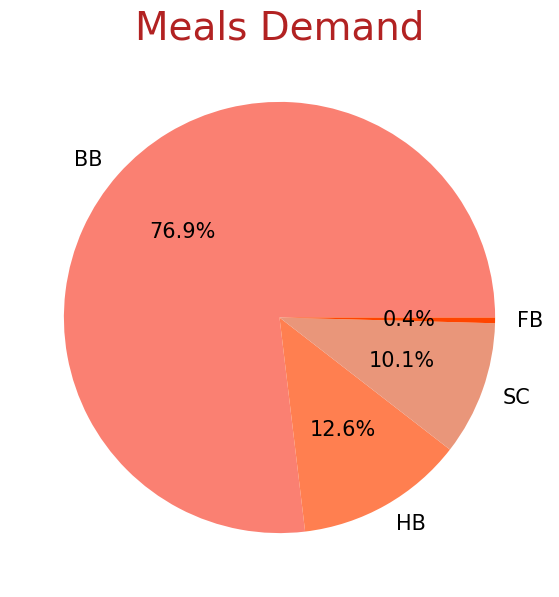

In [47]:
y=booking_df_copy_notCancelled['meal'].value_counts()
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.title("Meals Demand", size = 28,color='firebrick')
plt.pie(y,labels=y.index,autopct='%1.1f%%',colors=['salmon','coral','darksalmon','orangered'])
plt.show()

#### BB is the most desired meal by the visitors.

### Classification of visitors and their preferences of hotel and meal

In [48]:
#children with babies
booking_df_copy_notCancelled[['adults','children','babies','hotel','meal']][(booking_df_copy_notCancelled['adults'] == 0) & (booking_df_copy_notCancelled['children'] != 0) & (booking_df_copy_notCancelled['babies'] != 0)]

,adults,children,babies,hotel,meal
46150,0,2,1,City Hotel,BB
90790,0,2,1,City Hotel,BB


In [49]:
# considering children can not have babies these entries are removed. 
booking_df_copy_notCancelled.drop([46150,90790], axis=0, inplace=True)

C:\Users\Dimpi\AppData\Local\Temp\ipykernel_7808\1692189728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_copy_notCancelled.drop([46150,90790], axis=0, inplace=True)


In [50]:
booking_df_copy_notCancelled[['adults','children','babies','hotel','meal']][(booking_df_copy_notCancelled['adults'] == 0) & (booking_df_copy_notCancelled['children'] != 0) & (booking_df_copy_notCancelled['babies'] != 0)]

,adults,children,babies,hotel,meal


In [51]:
#only babies
booking_df_copy_notCancelled[['adults','children','babies','hotel','meal']][(booking_df_copy_notCancelled['adults'] == 0) & (booking_df_copy_notCancelled['children'] == 0) & (booking_df_copy_notCancelled['babies'] != 0)]

,adults,children,babies,hotel,meal


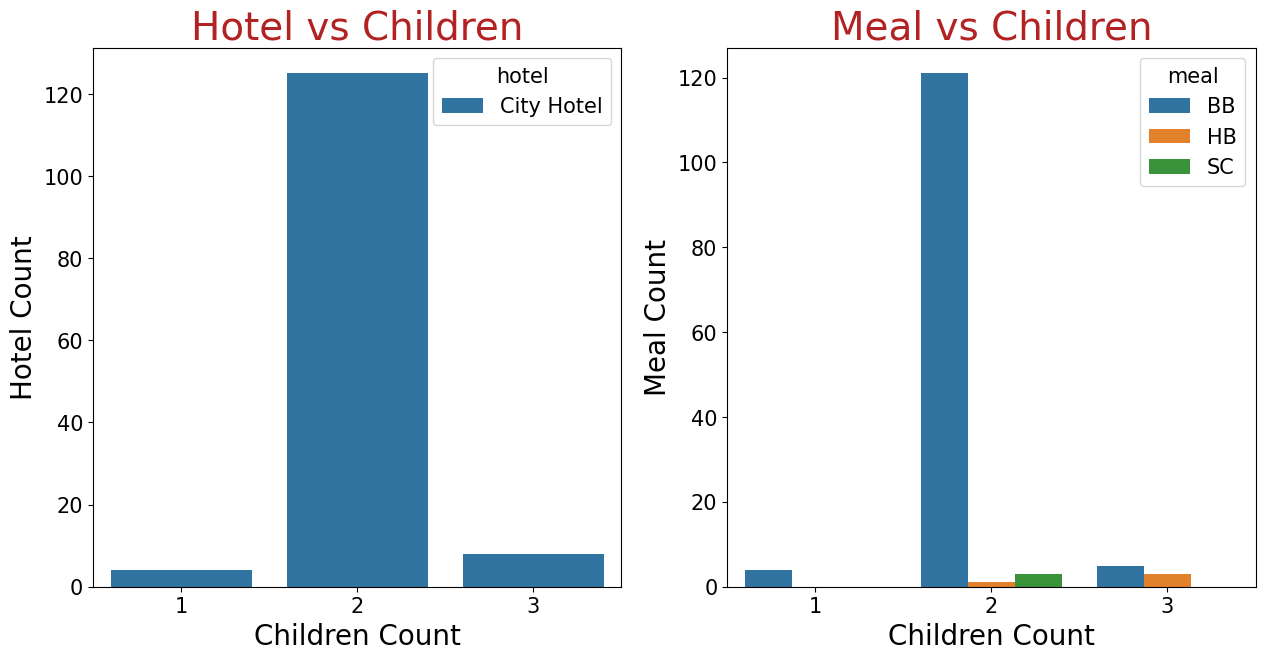

In [52]:
#children only with no adults
childrenOnly=booking_df_copy_notCancelled[['adults','children','babies','hotel','meal']][(booking_df_copy_notCancelled['adults'] == 0) & (booking_df_copy_notCancelled['children'] != 0)]
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0

plt.subplot(1,2,1)
sns.countplot(x='children',hue='hotel',data=childrenOnly)
plt.ylabel("Hotel Count", size = 20)
plt.xlabel("Children Count", size = 20)
plt.title("Hotel vs Children", size = 28,color='firebrick')

plt.subplot(1,2,2)
sns.countplot(x='children',hue='meal',data=childrenOnly)
plt.ylabel("Meal Count", size = 20)
plt.xlabel("Children Count", size = 20)
plt.title("Meal vs Children", size = 28,color='firebrick')
plt.show()

#### Children mostly visit in group of twos. Most of them prefer City hotel and BB as meal.

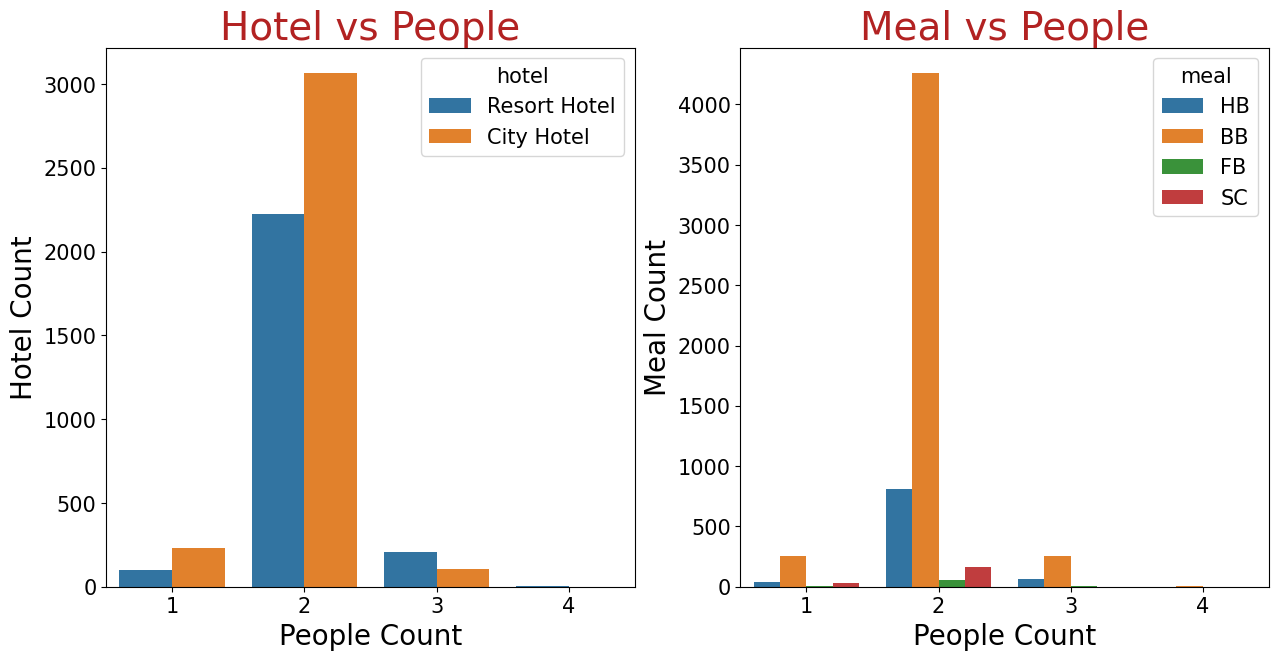

In [53]:
#adults with someone
adultsWithSomeone=booking_df_copy_notCancelled[['adults','children','babies','hotel','meal']][((booking_df_copy_notCancelled['adults'] != 0) & ((booking_df_copy_notCancelled['children'] != 0) | (booking_df_copy_notCancelled['babies'] != 0)))]
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0

plt.subplot(1,2,1)
sns.countplot(x='adults',hue='hotel',data=adultsWithSomeone)
plt.ylabel("Hotel Count", size = 20)
plt.xlabel("People Count", size = 20)
plt.title("Hotel vs People", size = 28,color='firebrick')

plt.subplot(1,2,2)
sns.countplot(x='adults',hue='meal',data=adultsWithSomeone)
plt.ylabel("Meal Count", size = 20)
plt.xlabel("People Count", size = 20)
plt.title("Meal vs People", size = 28,color='firebrick')
plt.show()

#### Mostly two adults visit together along with baby or child. Most of them prefer City hotel and BB as meal.

#### as most of the adults visited the hotels in a group of 2 people. We are further analyzing the data below.

In [54]:
twoAdults=booking_df_copy_notCancelled[['adults','children','babies']][((booking_df_copy_notCancelled['adults'] == 2))]
twoAdults.sample(2)

,adults,children,babies
18759,2,0,0
39146,2,2,0


In [55]:
# structuring the combination of the children and babies
twoAdultsdf=twoAdults.value_counts().reset_index(name='count')
twoAdultsdf

,adults,children,babies,count
0,2,0,0,49136
1,2,1,0,2681
2,2,2,0,1829
3,2,0,1,581
4,2,1,1,115
5,2,3,0,49
6,2,2,1,17
7,2,0,2,10
8,2,1,2,3
9,2,0,10,1


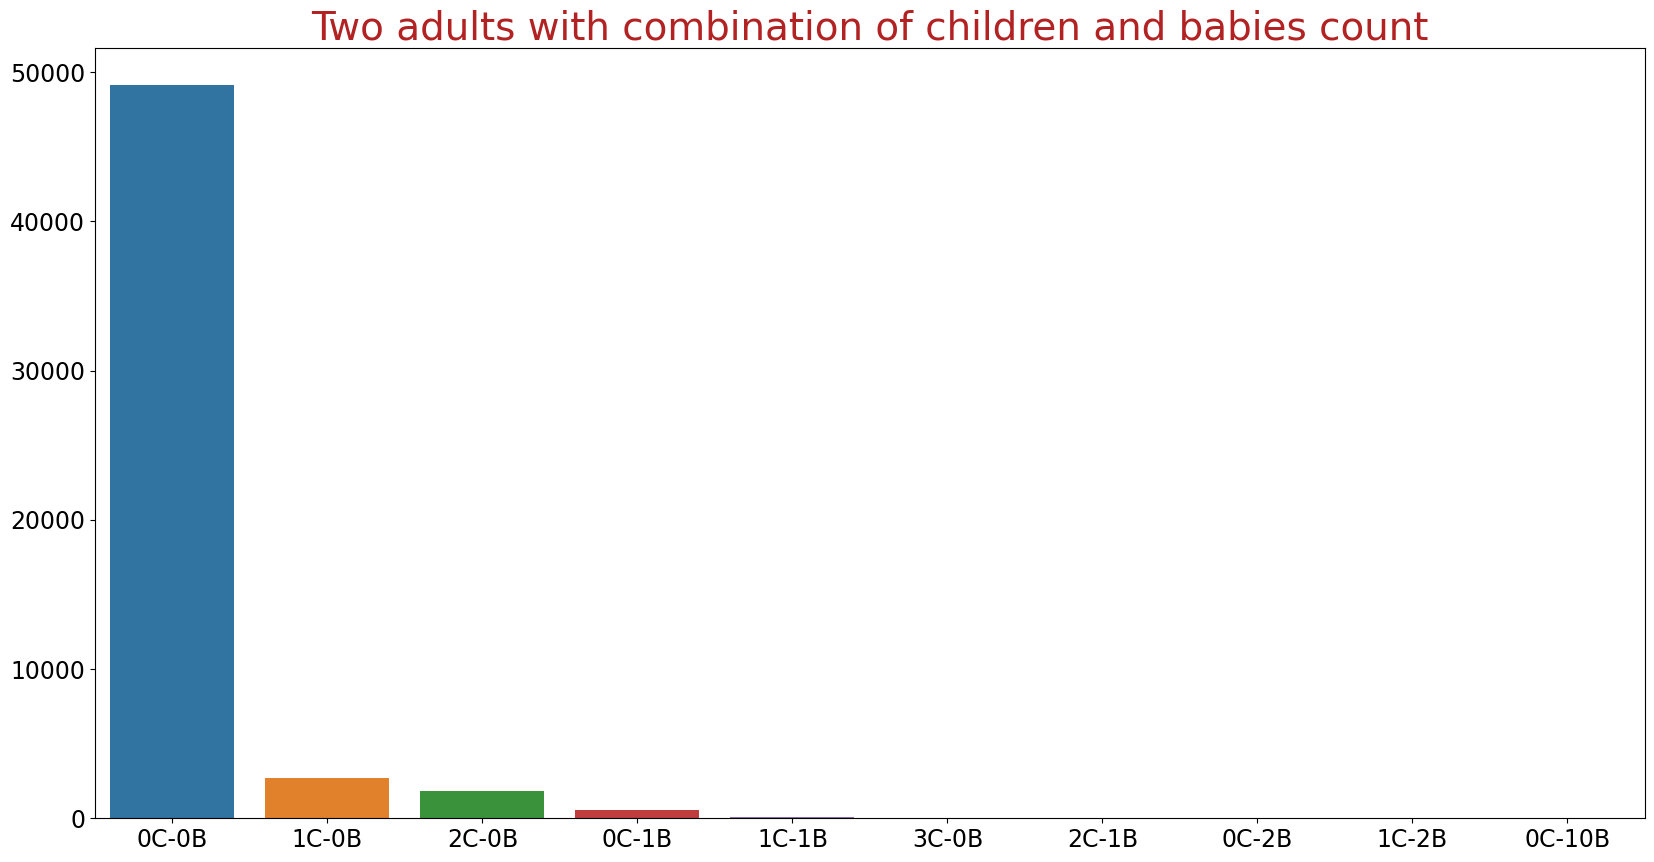

In [56]:
plt.figure(figsize = (20, 10))
plt.rcParams['font.size'] = 17.0
plt.title("Two adults with combination of children and babies count", size = 28,color='firebrick')
sns.barplot(y=list(twoAdultsdf['count']),x=['0C-0B','1C-0B','2C-0B','0C-1B','1C-1B','3C-0B','2C-1B','0C-2B','1C-2B','0C-10B'])
plt.show()

#### most of the time 2 adults visited the hotels with no one else and this count is 49136 and 2681 times 2 adults visited with 1 child and with no baby.

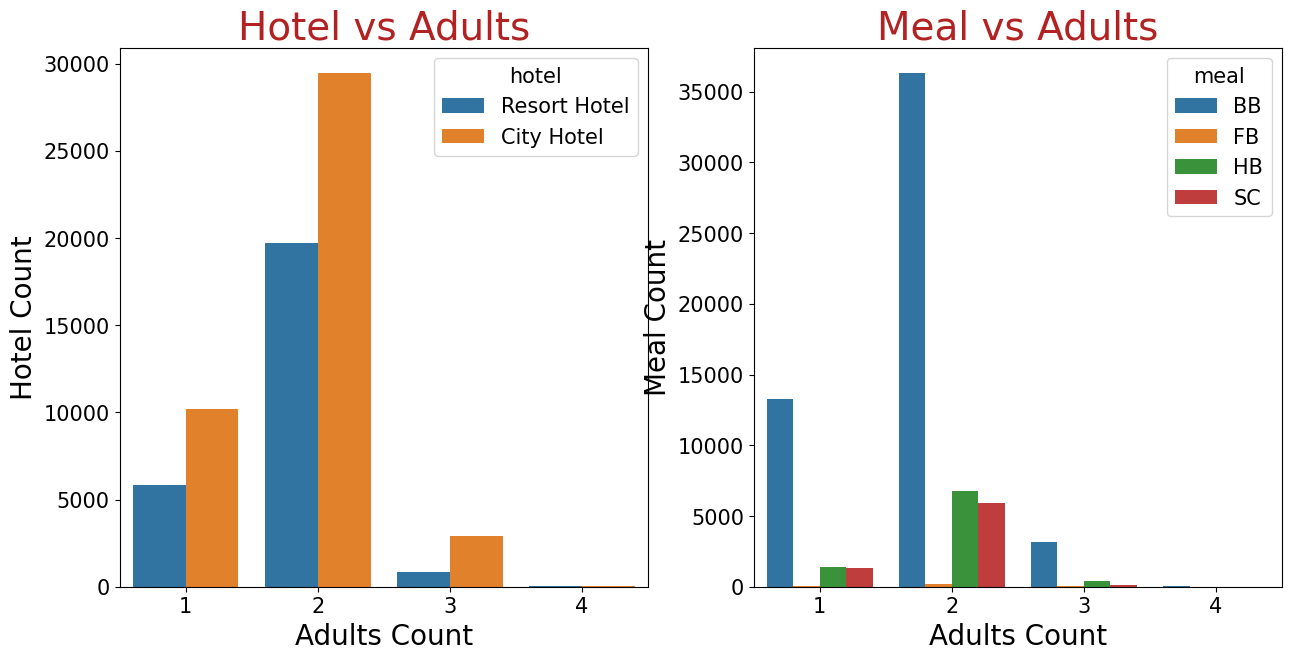

In [57]:
#adults with no one
adultsOnly=booking_df_copy_notCancelled[['adults','children','babies','hotel','meal']][(booking_df_copy_notCancelled['adults'] != 0) & (booking_df_copy_notCancelled['children'] == 0) & (booking_df_copy_notCancelled['babies'] == 0)]
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.title("Hotel vs Booking", size = 28,color='firebrick')
plt.subplot(1,2,1)
sns.countplot(x='adults',hue='hotel',data=adultsOnly)
plt.ylabel("Hotel Count", size = 20)
plt.xlabel("Adults Count", size = 20)
plt.title("Hotel vs Adults", size = 28,color='firebrick')
plt.subplot(1,2,2)
sns.countplot(x='adults',hue='meal',data=adultsOnly)
plt.ylabel("Meal Count", size = 20)
plt.xlabel("Adults Count", size = 20)
plt.title("Meal vs Adults", size = 28,color='firebrick')
plt.show()

#### Mostly two adults visit together with no baby or child. Most of them prefer City hotel and BB as meal.

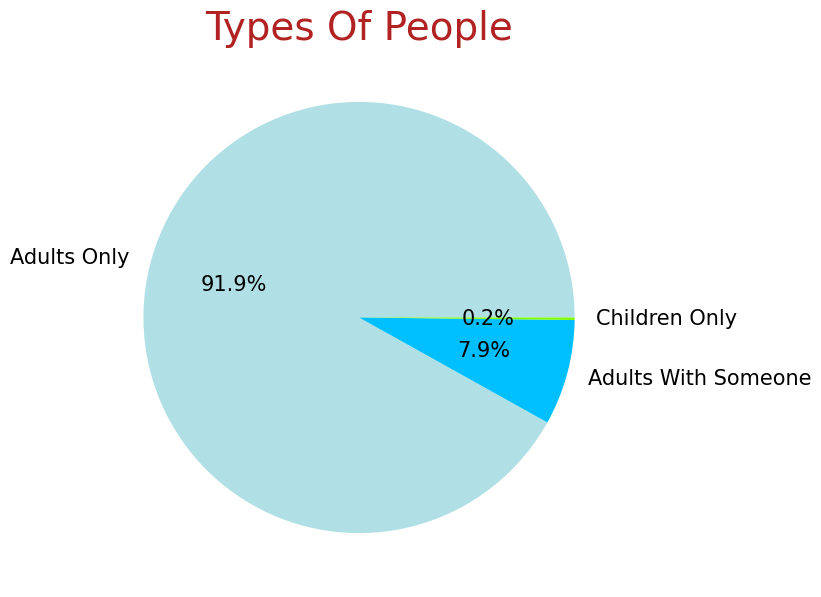

In [58]:
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.title("Types Of People", size = 28,color='firebrick')
plt.pie([adultsOnly['adults'].count(),adultsWithSomeone['adults'].count(),childrenOnly['adults'].count()],labels=['Adults Only','Adults With Someone','Children Only'],autopct='%1.1f%%',colors=['powderblue','deepskyblue','lawngreen'])
plt.show()

#### So the visitors are grouped in 3 catagories - Only Adults, Only Children and Adults with Someone. Among them highest number of visitors belonged to Only Adults group.

In [59]:
booking_df_copy_notCancelled['total_guests']=booking_df_copy_notCancelled['adults'] + booking_df_copy_notCancelled['babies']+booking_df_copy_notCancelled['children']
booking_df_copy_notCancelled['total_guests'].value_counts()

C:\Users\Dimpi\AppData\Local\Temp\ipykernel_7808\2423342104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_copy_notCancelled['total_guests']=booking_df_copy_notCancelled['adults'] + booking_df_copy_notCancelled['babies']+booking_df_copy_notCancelled['children']


2     49479
1     16026
3      7116
4      2283
0       155
5       103
12        1
10        1
Name: total_guests, dtype: int64

### Min and Max Adr calculation Hotelwise

In [60]:
booking_df_copy_notCancelled['adr'].describe()

count    75164.000000
mean        99.987779
std         49.206810
min         -6.380000
25%         67.500000
50%         92.500000
75%        125.000000
max        510.000000
Name: adr, dtype: float64

In [61]:
# min value of Adr is negative but value of rate can not be negative. Must be a type mismatch. So we are replacing this with positive value and checked if other negative rates are present or not.
negativeADR=[]
i=0
for i in list(booking_df_copy_notCancelled['adr']):
    if i < 0:
        negativeADR.append(i)
negativeADR
booking_df_copy_notCancelled['adr'].replace(to_replace=-6.38,value=6.38,inplace= True)

C:\Users\Dimpi\AppData\Local\Temp\ipykernel_7808\2610135094.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_copy_notCancelled['adr'].replace(to_replace=-6.38,value=6.38,inplace= True)


In [62]:
booking_df_copy_notCancelled[booking_df_copy_notCancelled['adr']== -6.38000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests


In [63]:
booking_df_copy_notCancelled.groupby(['hotel'])['adr'].min()

hotel
City Hotel      0.0
Resort Hotel    0.0
Name: adr, dtype: float64

In [64]:
#adr can't be 0. So the condition is added.
booking_df_copy_notCancelled[booking_df_copy_notCancelled['adr']!=0].groupby(['hotel'])['adr'].min()

hotel
City Hotel      1.00
Resort Hotel    0.26
Name: adr, dtype: float64

#### So the min adr for city hotel is 1 and for resort hotel it's 0.26

In [65]:
#adr can't be 0. So the condition is added.
booking_df_copy_notCancelled[booking_df_copy_notCancelled['adr']!=0].groupby(['hotel'])['adr'].max()

hotel
City Hotel      510.0
Resort Hotel    508.0
Name: adr, dtype: float64

#### So the max adr for city hotel is 510 and for resort hotel it's 508

### Revenue generated in hotels

In [66]:
booking_df_copy_notCancelled['total_nights']=booking_df_copy_notCancelled['stays_in_weekend_nights'] + booking_df_copy_notCancelled['stays_in_week_nights']
booking_df_copy_notCancelled['total_bills']=booking_df_copy_notCancelled['total_nights'] * booking_df_copy_notCancelled['adr']
booking_df_copy_notCancelled[['adr','total_nights','total_bills']].sample()

C:\Users\Dimpi\AppData\Local\Temp\ipykernel_7808\36382009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_copy_notCancelled['total_nights']=booking_df_copy_notCancelled['stays_in_weekend_nights'] + booking_df_copy_notCancelled['stays_in_week_nights']
C:\Users\Dimpi\AppData\Local\Temp\ipykernel_7808\36382009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking_df_copy_notCancelled['total_bills']=booking_df_copy_notCancelled['total_nights'] * booking_df_copy_notCancelled['adr']


,adr,total_nights,total_bills
86818,119.0,1,119.0


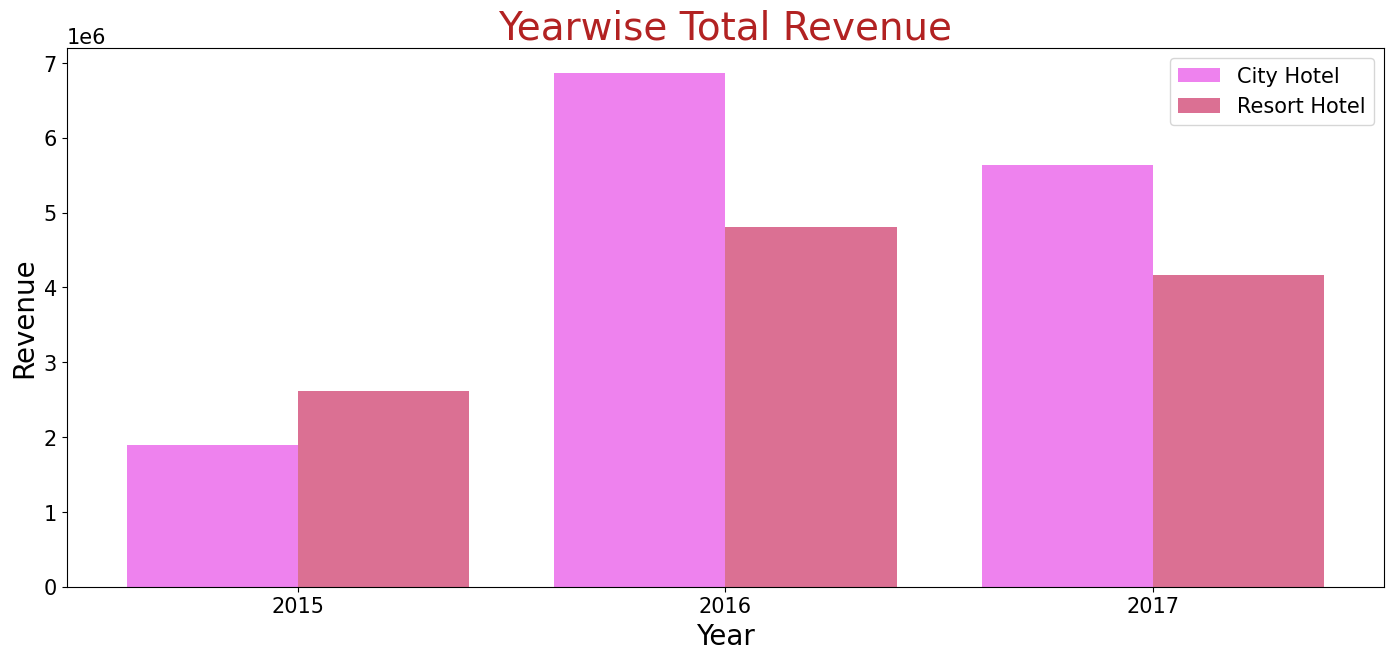

In [67]:
revenueDF=booking_df_copy_notCancelled.groupby(['hotel','arrival_date_year'])['total_bills'].sum()
structuredRevenueDF=revenueDF.unstack(level=-1).reset_index()
cityRevenueList=list(structuredRevenueDF[0:1].squeeze(axis=0))[1:]
resortRevenueList=list(structuredRevenueDF[1:2].squeeze(axis=0))[1:]
year=['2015','2016','2017']
xAxis= np.arange(len(year))
plt.figure(figsize = (17, 7))
plt.title("Yearwise Total Revenue", size = 28,color='firebrick')
plt.rcParams['font.size'] = 15.0
plt.ylabel("Revenue", size = 20)
plt.xlabel("Year", size = 20)
plt.bar(xAxis - 0.2,cityRevenueList,0.4, label= 'City Hotel',color='violet')
plt.bar(xAxis + 0.2,resortRevenueList,0.4, label= 'Resort Hotel',color='palevioletred')
plt.xticks(xAxis,year)
plt.legend()
plt.show()

#### From the graph we can easily say that out of all the years in 2016 the generated revenue was highest for both types of hotel. In 2015 revenue of Resort Hotel was more than City Hotel. In 2016 and 2017 the reverse case was shown.

### Market segment analysis

C:\Users\Dimpi\AppData\Local\Temp\ipykernel_7808\336792369.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  market=booking_df_copy_notCancelled.groupby(['market_segment'])['market_segment','hotel'].count()


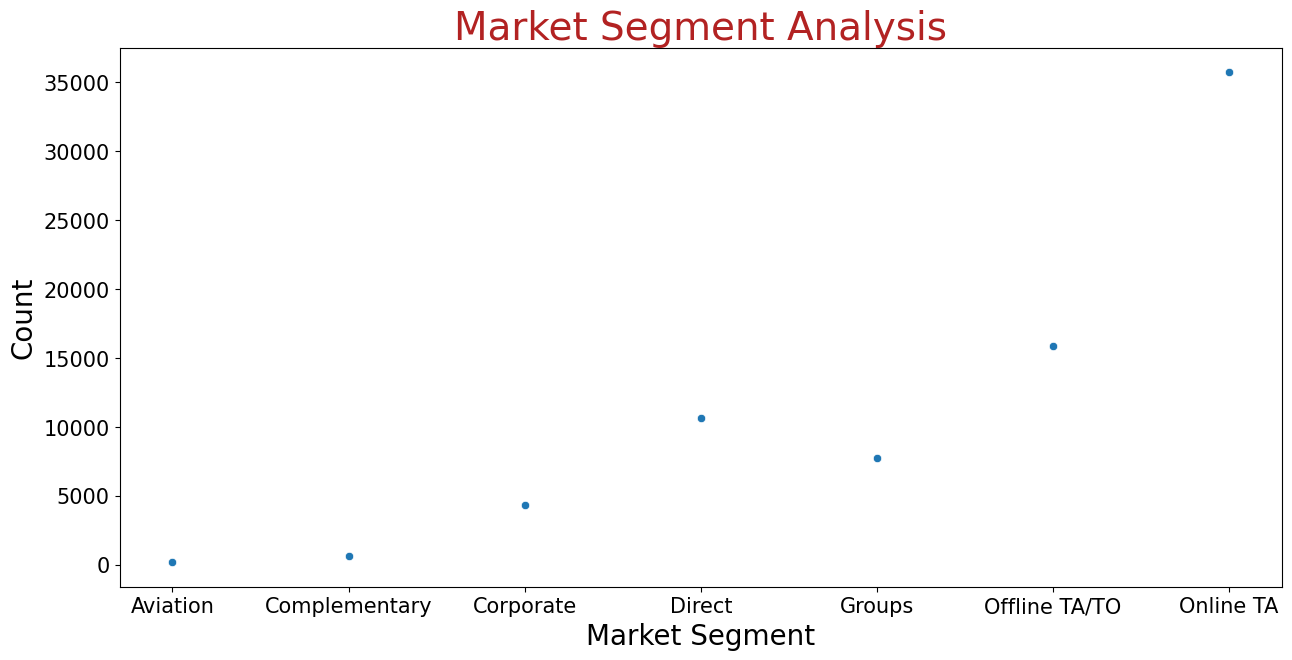

In [68]:
market=booking_df_copy_notCancelled.groupby(['market_segment'])['market_segment','hotel'].count()
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
sns.scatterplot(x=market.index,y=market.hotel)
plt.ylabel("Count", size = 20)
plt.xlabel("Market Segment", size = 20)
plt.title("Market Segment Analysis", size = 28,color='firebrick')
plt.show()

#### From the scatterplot we can say that Online Travel Agent has the highest value in Market Segment.    

### Distribution Channel Analysis

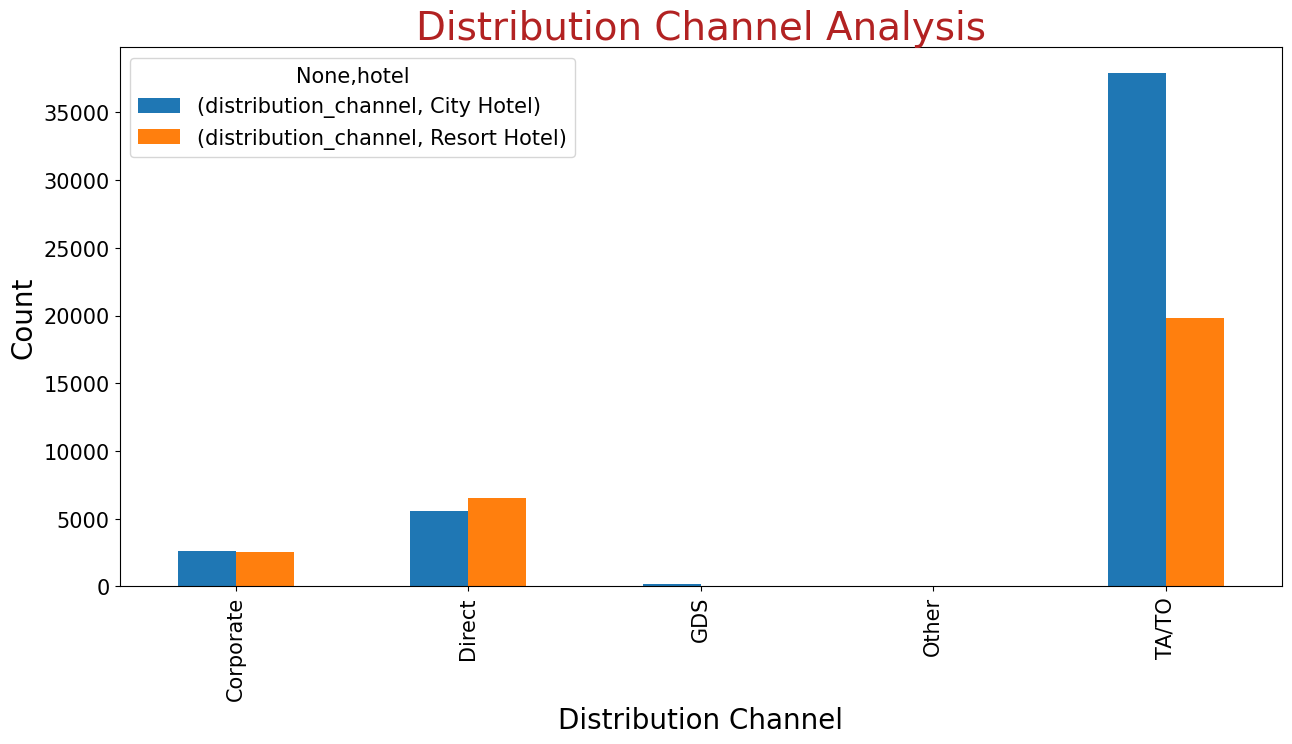

In [69]:
distribution=booking_df_copy_notCancelled.groupby(['distribution_channel','hotel'])[['distribution_channel']].count()
distribution.unstack().plot(kind='bar',figsize=(15,7),xlabel='Room Type',ylabel='Count',legend=['c','h'])
plt.xlabel('Distribution Channel',size=20)
plt.ylabel('Count',size=20)
plt.title("Distribution Channel Analysis", size = 28,color='firebrick')
plt.show()

#### By TA/TO most of the bookings were done.

### Average Tourist in Each Month

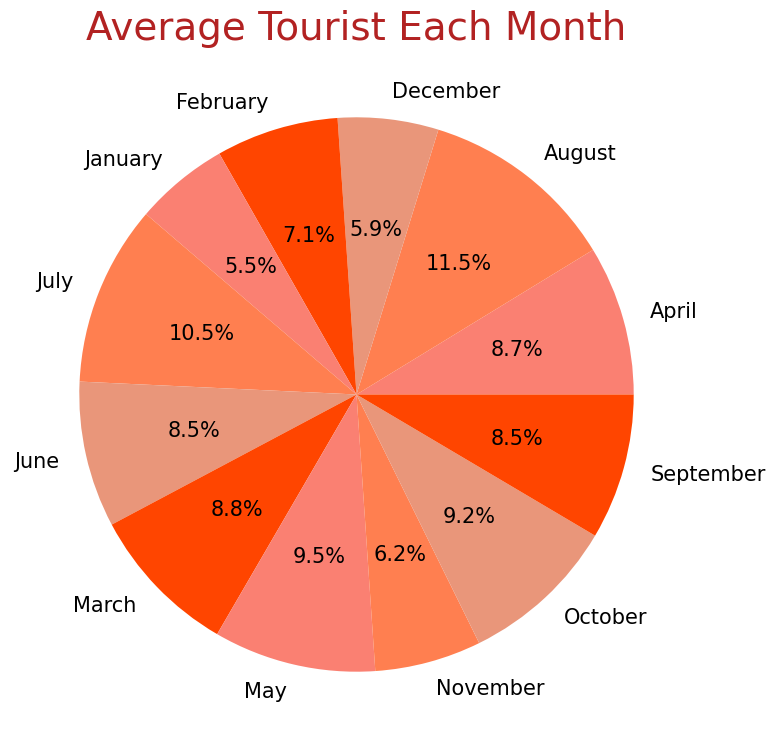

In [70]:
monthCount=(booking_df_copy_notCancelled.groupby(['arrival_date_month'])[['arrival_date_month']].value_counts() * 100) /len(booking_df_copy_notCancelled['hotel'])
plt.figure(figsize = (20, 9))
plt.rcParams['font.size'] = 15.0
plt.title("Average Tourist Each Month", size = 28,color='firebrick')
plt.pie(monthCount.to_numpy(),labels=monthCount.index,autopct='%1.1f%%',colors=['salmon','coral','darksalmon','orangered'])
plt.show()

#### From the pie chart we can say that most of the visitors came in the month of August and July. January had the least visitors. 

### Which type of customer booked the hotels most?  

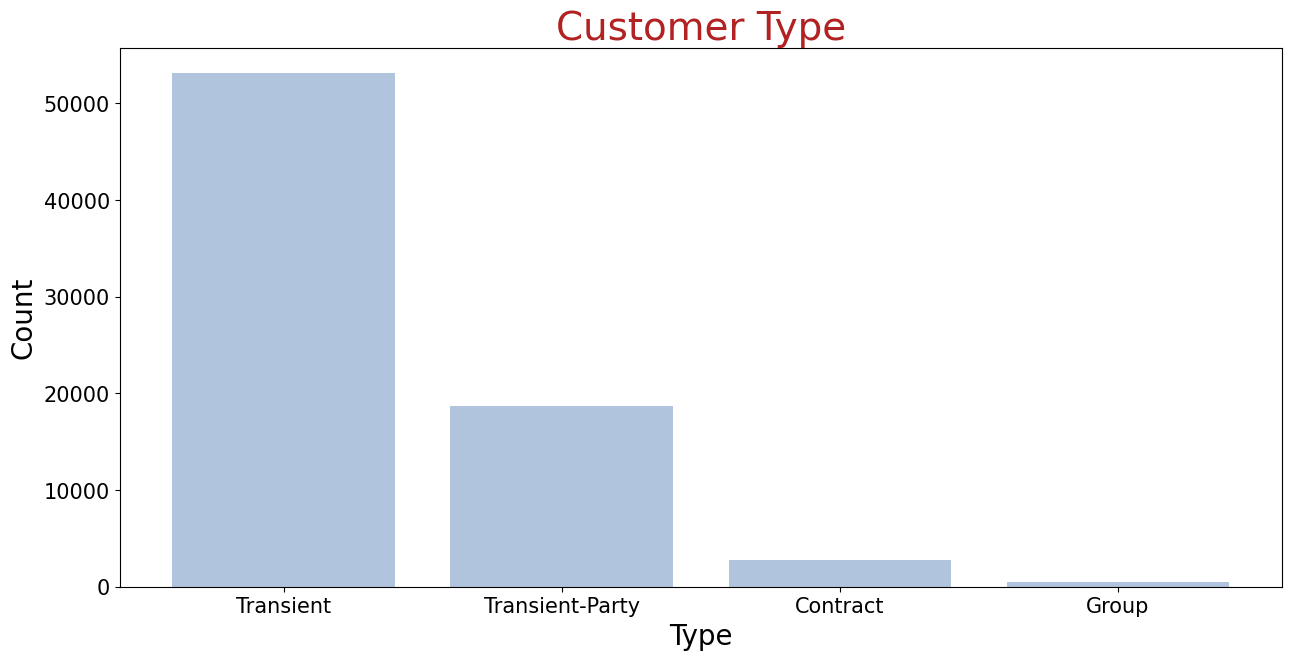

In [71]:
customerType=booking_df_copy_notCancelled['customer_type'].value_counts()
plt.figure(figsize = (15, 7))
plt.bar(customerType.index,customerType.to_numpy(),color='lightsteelblue')
plt.xlabel('Type',size=20)
plt.ylabel('Count',size=20)
plt.title("Customer Type", size = 28,color='firebrick')
plt.show()

#### Transient type of customer booked the hotels most and in Group the customer count is least. 

### Types of deposit at the time of booking

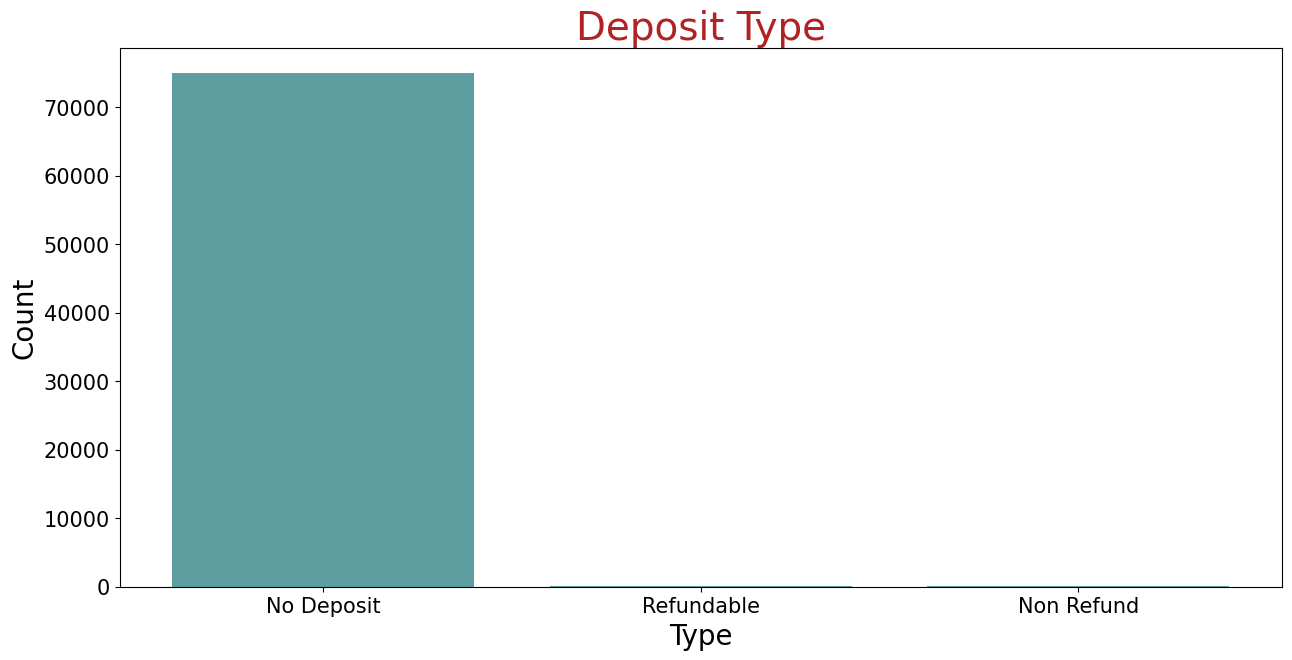

In [72]:
deposit=booking_df_copy_notCancelled['deposit_type'].value_counts()
plt.figure(figsize = (15, 7))
plt.bar(deposit.index,deposit.to_numpy(),color='cadetblue')
plt.xlabel('Type',size=20)
plt.ylabel('Count',size=20)
plt.title("Deposit Type", size = 28,color='firebrick')
plt.show()

#### The booking rate of those hotels are highest which have no deposit fecility and least which have non refund policy

### Percentage of Repeated Guests

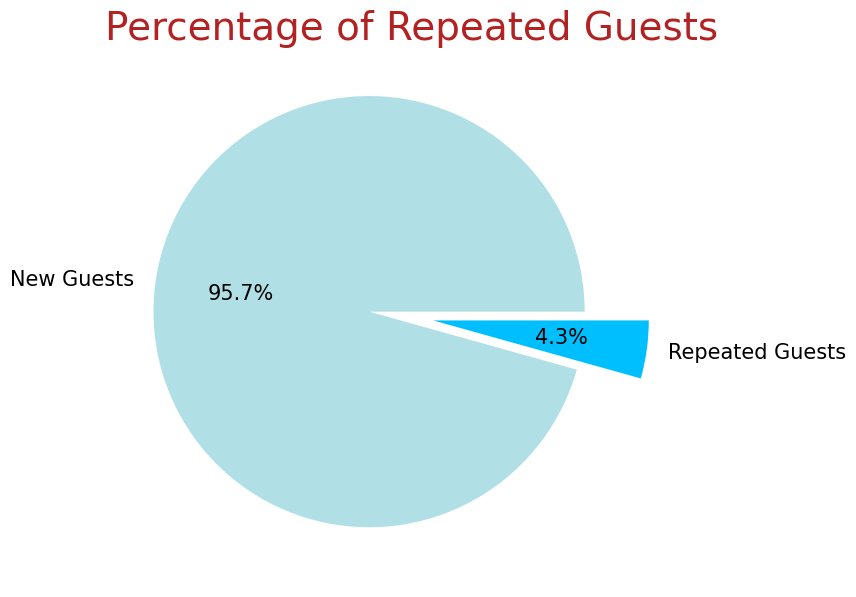

In [73]:
plt.figure(figsize = (15, 7))
plt.rcParams['font.size'] = 15.0
plt.title("Percentage of Repeated Guests", size = 28,color='firebrick')
plt.pie(booking_df_copy_notCancelled.groupby(['is_repeated_guest'])[['is_repeated_guest']].value_counts().to_numpy(),labels=['New Guests','Repeated Guests'],autopct='%1.1f%%',colors=['powderblue','deepskyblue'],explode=[0.2,0.1])
plt.show()

#### Repeated guests are only 4.3%. This percentage is very low. Management should improve the service so that number of repeated guests increases.

### %ge of guests who have checked out

In [74]:
booking_df_copy_notCancelled['reservation_status'].value_counts()

Check-Out    75164
Name: reservation_status, dtype: int64

#### All guests checked out.

### Min and Max count of number of changes/amendments made to the booking from the moment the booking was entered on the PMS(Hotel Property Management System) until the moment of check-in or cancellation.

In [75]:
booking_df_copy_notCancelled['booking_changes'].value_counts().sort_index()

0     59922
1     10894
2      3038
3       783
4       309
5        98
6        45
7        28
8        13
9         7
10        5
11        2
12        2
13        5
14        4
15        3
16        1
17        2
18        1
20        1
21        1
Name: booking_changes, dtype: int64

#### For 59922 bookings customers made no changes to the booking from the moment the booking was entered on the PMS(Hotel Property Management System) until the moment of check-in or cancellation. For only 1 booking the customer changed the booking 21 times and this was the maximum count. 

### Min and Max count of number of days the booking was in the waiting list before it was confirmed to the customer.

In [76]:
booking_df_copy_notCancelled['days_in_waiting_list'].value_counts().sort_index()

0      73825
1          9
2          4
4         17
5          3
       ...  
224        4
236       29
259       10
330       14
379        6
Name: days_in_waiting_list, Length: 98, dtype: int64

#### For 73825 bookings visitors waited 0 days before booking confirmation. 6 visitors waited for 379 days before booking confirmation and this is the maximum count.

### Min and Max count of number of days that elapsed between the entering date of the booking into the PMS(Hotel Property Management System) and the arrival date.

In [77]:
booking_df_copy_notCancelled['lead_time'].value_counts().sort_index()

0      5915
1      3139
2      1856
3      1634
4      1539
       ... 
518      22
532       1
542      23
709       1
737       1
Name: lead_time, Length: 422, dtype: int64

#### For 5915 bookings there was 0 day gap between entering date of the booking into the PMS(Hotel Property Management System) and the arrival date.For 1 booking the same count is 737 days and this is the highest.